In [78]:
import numpy as np
from skimage import io, transform
import matplotlib.pyplot as plt
from scipy import ndimage


In [18]:
# Funkcja do wczytywania i przekształcania obrazu
def przygotuj_obraz(sciezka: str, rozmiar: tuple) -> np.ndarray:
    obraz = io.imread(sciezka)
    obraz = obraz[:, :, :3]  # Zignoruj kanał alfa
    obraz = transform.resize(obraz, output_shape=rozmiar)
    return obraz

In [77]:
# filtr Bayera
def generuj_cfa(maska: np.ndarray, rozmiar: tuple) -> np.ndarray:
    return np.dstack([np.tile(maska[:, :, kanal], np.asarray(rozmiar) // len(maska[:, :, kanal]))
                      for kanal in range(maska.shape[-1])])

In [75]:
# demozaikowanie
def demosaicking(obraz: np.ndarray, maska: np.ndarray) -> np.ndarray:
    """Funkcja wykonująca demosaicking za pomocą maski konwolucji dla każdego kanału."""
    # Podziel obraz na kanały
    obraz_kanały = np.dsplit(obraz, 3)  # Dzielimy obraz na 3 kanały (R, G, B)

    # Stosowanie konwolucji do każdego kanału
    obraz_demozaikowany = np.dstack([
        ndimage.convolve(obraz_kanały[i][:, :, 0], maska[:, :, i], mode="constant", cval=0.0)
        for i in range(3)
    ])

    return obraz_demozaikowany

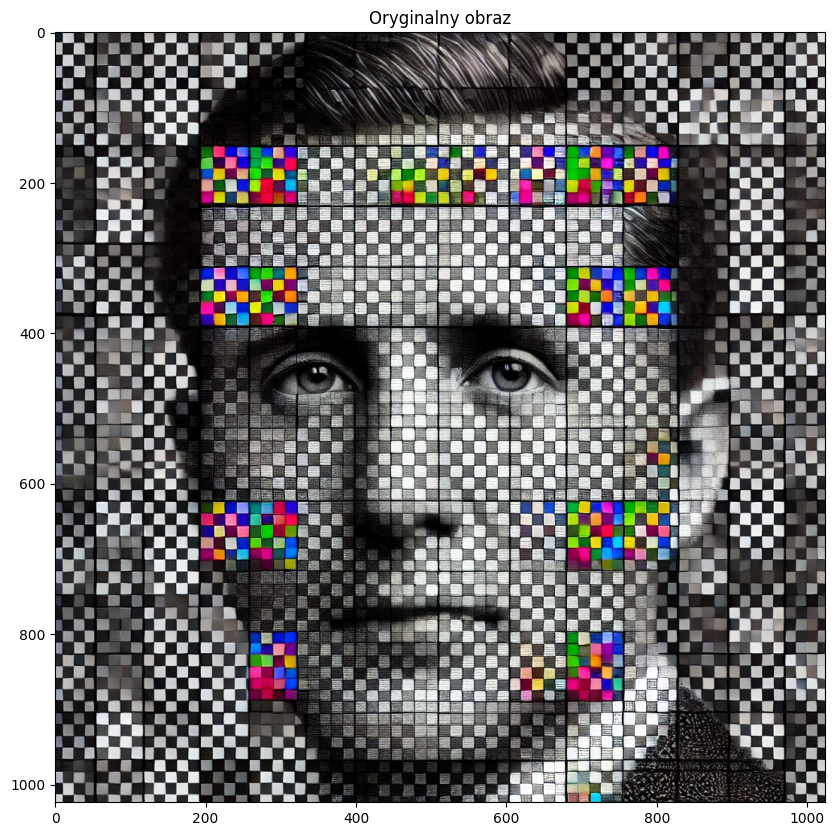

In [82]:
# Załadaowanie obrazu
obraz = przygotuj_obraz("/content/aaa", (1024, 1024, 3)) #sciezka do plikow tutaj
plt.figure(figsize=(10, 10))
plt.imshow(obraz)
plt.title("Oryginalny obraz")
plt.show()


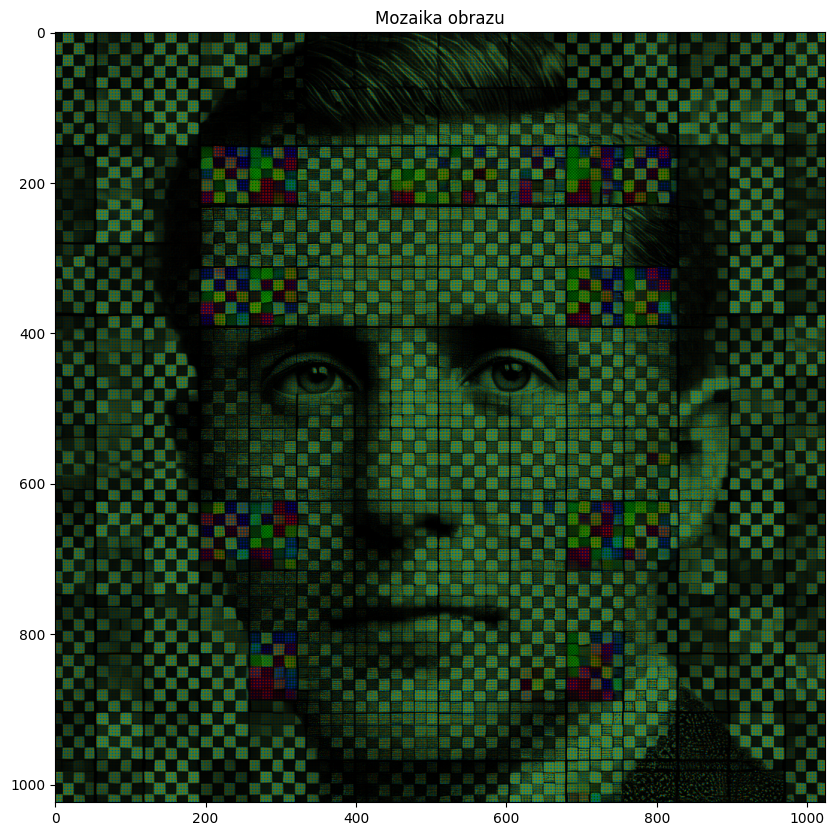

In [83]:
# maska Bayera (2x2)
bayer_maska = np.array([[[0, 1], [0, 0]],  # R
                       [[1, 0], [0, 1]],  # G
                       [[0, 0], [1, 0]]], dtype=np.uint8)  # B

bayer_maska = np.transpose(bayer_maska, axes=(1, 2, 0))

# Zastosowanie filtra Bayera
bayer_filtr = generuj_cfa(bayer_maska, rozmiar=(1024, 1024))
mozaika_obraz = obraz * bayer_filtr

# ploty (wyświetlanie)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.imshow(mozaika_obraz)
plt.title("Mozaika obrazu")
plt.show()


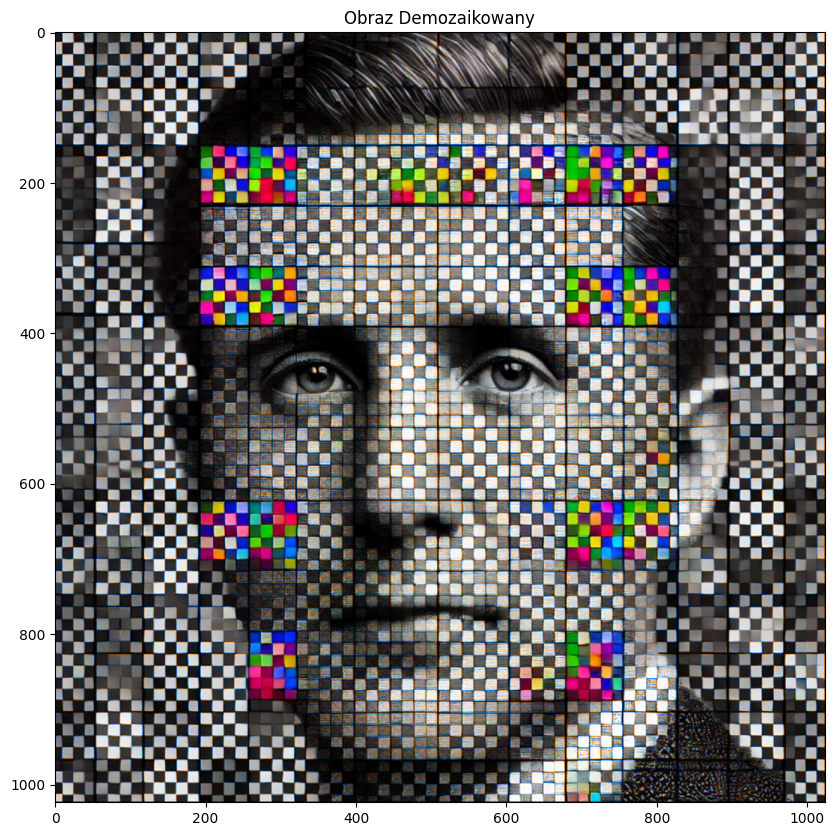

In [86]:
# Przykład maski do demosaickingu (Bayer)
demosaicking_maska = np.dstack([
    np.ones([2, 2]),        # R
    0.5 * np.ones([2, 2]),  # G
    np.ones([2, 2]),        # B
])



# Wykonaj demozaikowanie
obraz_demozaikowany = demosaicking(mozaika_obraz, demosaicking_maska)




# ploty (wyświetlanie)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.imshow(obraz_demozaikowany)
plt.title("Obraz Demozaikowany")
plt.show()